In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import r2_score
from sklearn.externals import joblib

from sorder.models.linear_regression import Corpus

In [ ]:
train = Corpus('/Users/dclure/Projects/sent-order/data/train.json')

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [113]:
vocab = (
    train.most_common_ngrams(1, 3000) |
    train.most_common_ngrams(2, 2000) |
    train.most_common_ngrams(3, 1000)
)

HBox(children=(IntProgress(value=0, max=884912), HTML(value='')))

HBox(children=(IntProgress(value=0, max=884912), HTML(value='')))

HBox(children=(IntProgress(value=0, max=884912), HTML(value='')))

In [114]:
dv = DictVectorizer()

In [115]:
train_x, train_y = zip(*train.xy(vocab))

HBox(children=(IntProgress(value=0, max=884912), HTML(value='')))

In [116]:
train_x = dv.fit_transform(train_x)

In [119]:
joblib.dump(dv, 'dv.bin')

['fit.bin']

In [117]:
model = LinearRegression()

In [118]:
fit = model.fit(train_x, train_y)

In [ ]:
joblib.dump(fit, 'fit.bin')

# Dev

In [120]:
dev = Corpus('/Users/dclure/Projects/sent-order/data/dev.json')

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [121]:
dev_x, dev_y = zip(*dev.xy(vocab))

HBox(children=(IntProgress(value=0, max=110614), HTML(value='')))

In [122]:
dev_x = dv.transform(dev_x)

In [123]:
correct = Counter()
total = Counter()

for ab in tqdm_notebook(dev.abstracts):
    
    x, _ = zip(*ab.xy(vocab))
    x = dv.transform(x)
    
    order = list(fit.predict(x).argsort().argsort())
    
    if sorted(order) == order:
        correct[len(order)] += 1
        
    total[len(order)] += 1

HBox(children=(IntProgress(value=0, max=110614), HTML(value='')))

In [124]:
sum(correct.values()) / sum(total.values())

0.24137089337696857

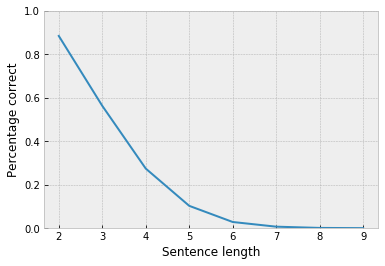

In [125]:
x = sorted(correct.keys())
y = [correct[slen] / total[slen] for slen in x]

plt.ylim(0, 1)
plt.xlabel('Sentence length')
plt.ylabel('Percentage correct')
plt.plot(x, y)

In [126]:
kts = defaultdict(list)
for ab in tqdm_notebook(dev.abstracts):
    
    x, _ = zip(*ab.xy(vocab))
    x = dv.transform(x)
    
    pred = fit.predict(x).argsort()
    kt, _ = stats.kendalltau(pred, range(len(pred)))
    kts[len(pred)].append(kt)

HBox(children=(IntProgress(value=0, max=110614), HTML(value='')))

/Users/dclure/Projects/plot-ordering/env/lib/python3.6/site-packages/scipy/stats/stats.py:3559: RuntimeWarning: invalid value encountered in double_scalars
  size * (size - 1) * (size - 2))


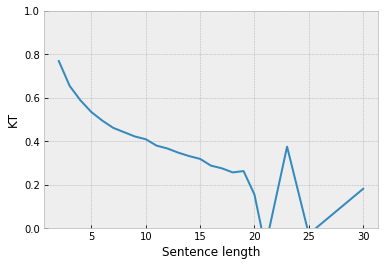

In [127]:
x = sorted(kts.keys())
y = [sum(kts[slen]) / len(kts[slen]) for slen in x]

plt.ylim(0, 1)
plt.xlabel('Sentence length')
plt.ylabel('KT')
plt.plot(x, y)

In [130]:
lengths = [len(ab.sentences) for ab in train.abstracts]

(array([  6.37414000e+05,   2.09740000e+05,   3.67240000e+04,
          9.61000000e+02,   6.50000000e+01,   4.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  2. ,   6.5,  11. ,  15.5,  20. ,  24.5,  29. ,  33.5,  38. ,
         42.5,  47. ]),
 <a list of 10 Patch objects>)

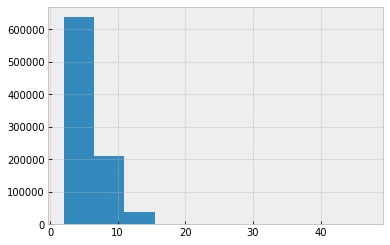

In [131]:
plt.hist(lengths)